In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import mutual_info_classif

In [67]:
from xgboost import XGBClassifier

In [68]:
dataset = pd.read_csv('test-f.csv')
dataset.head()

,result_game,count_matches_team1,count_matches_team2,winrate_team1,winrate_team2,luse_rate_team1,luse_rate_team2,drow_rate_team1,drow_rate_team2,total_avg_team1_in_match,...,ind_oponent_total_save_team2,save_total_in_match_team1,save_total_in_match_team2,ind_possession_time_team1,ind_possession_time_team2,ind_oponent_possession_time_team1,ind_oponent_possession_time_team2,count_collision,win_in_collision_team1,win_in_collision_team2
0,0,48,50,41.666667,48.0,18.75,16.0,39.583333,36.0,3.0,...,3.2,7.5,5.8,58,54,42,46,2,1,1
1,1,50,50,54.000000,32.0,16.00,32.0,30.000000,36.0,3.4,...,2.7,6.3,5.7,50,47,50,53,19,14,2
2,-1,50,50,38.000000,38.0,20.00,26.0,42.000000,36.0,3.0,...,3.3,6.9,7.5,48,53,52,47,16,3,11
3,0,50,50,24.000000,12.0,28.00,12.0,48.000000,76.0,2.3,...,2.8,6.1,6.4,42,48,58,52,2,2,0
4,-1,50,50,36.000000,24.0,24.00,30.0,40.000000,46.0,3.4,...,3.4,6.1,6.7,54,48,46,52,17,8,4


In [69]:
dataset[dataset.result_game == 0]

,result_game,count_matches_team1,count_matches_team2,winrate_team1,winrate_team2,luse_rate_team1,luse_rate_team2,drow_rate_team1,drow_rate_team2,total_avg_team1_in_match,...,ind_oponent_total_save_team2,save_total_in_match_team1,save_total_in_match_team2,ind_possession_time_team1,ind_possession_time_team2,ind_oponent_possession_time_team1,ind_oponent_possession_time_team2,count_collision,win_in_collision_team1,win_in_collision_team2
0,0,48,50,41.666667,48.000000,18.75,16.000000,39.583333,36.00000,3.0,...,3.2,7.5,5.8,58,54,42,46,2,1,1
3,0,50,50,24.000000,12.000000,28.00,12.000000,48.000000,76.00000,2.3,...,2.8,6.1,6.4,42,48,58,52,2,2,0
6,0,50,50,52.000000,44.000000,22.00,28.000000,26.000000,28.00000,3.2,...,3.0,5.8,6.9,60,52,40,48,17,8,4
7,0,40,50,40.000000,34.000000,27.50,18.000000,32.500000,48.00000,2.4,...,3.5,5.4,12.4,46,44,54,56,4,1,1
9,0,50,50,26.000000,36.000000,26.00,16.000000,48.000000,48.00000,3.2,...,2.8,6.7,5.8,51,47,49,53,5,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,0,50,50,14.000000,36.000000,16.00,20.000000,70.000000,44.00000,2.7,...,3.1,6.5,6.0,47,50,53,51,8,3,4
1491,0,50,42,26.000000,42.857143,26.00,16.666667,48.000000,40.47619,3.0,...,3.6,5.9,7.6,40,58,61,42,4,1,2
1505,0,50,50,28.000000,52.000000,42.00,26.000000,30.000000,22.00000,2.1,...,3.9,5.7,6.3,53,60,47,40,10,0,6
1509,0,50,50,56.000000,26.000000,24.00,42.000000,20.000000,32.00000,2.5,...,2.9,6.1,5.5,62,53,39,47,9,6,0


In [70]:
X = dataset[dataset.columns[1:].values]
y = dataset[dataset.columns[:1].values]

G:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


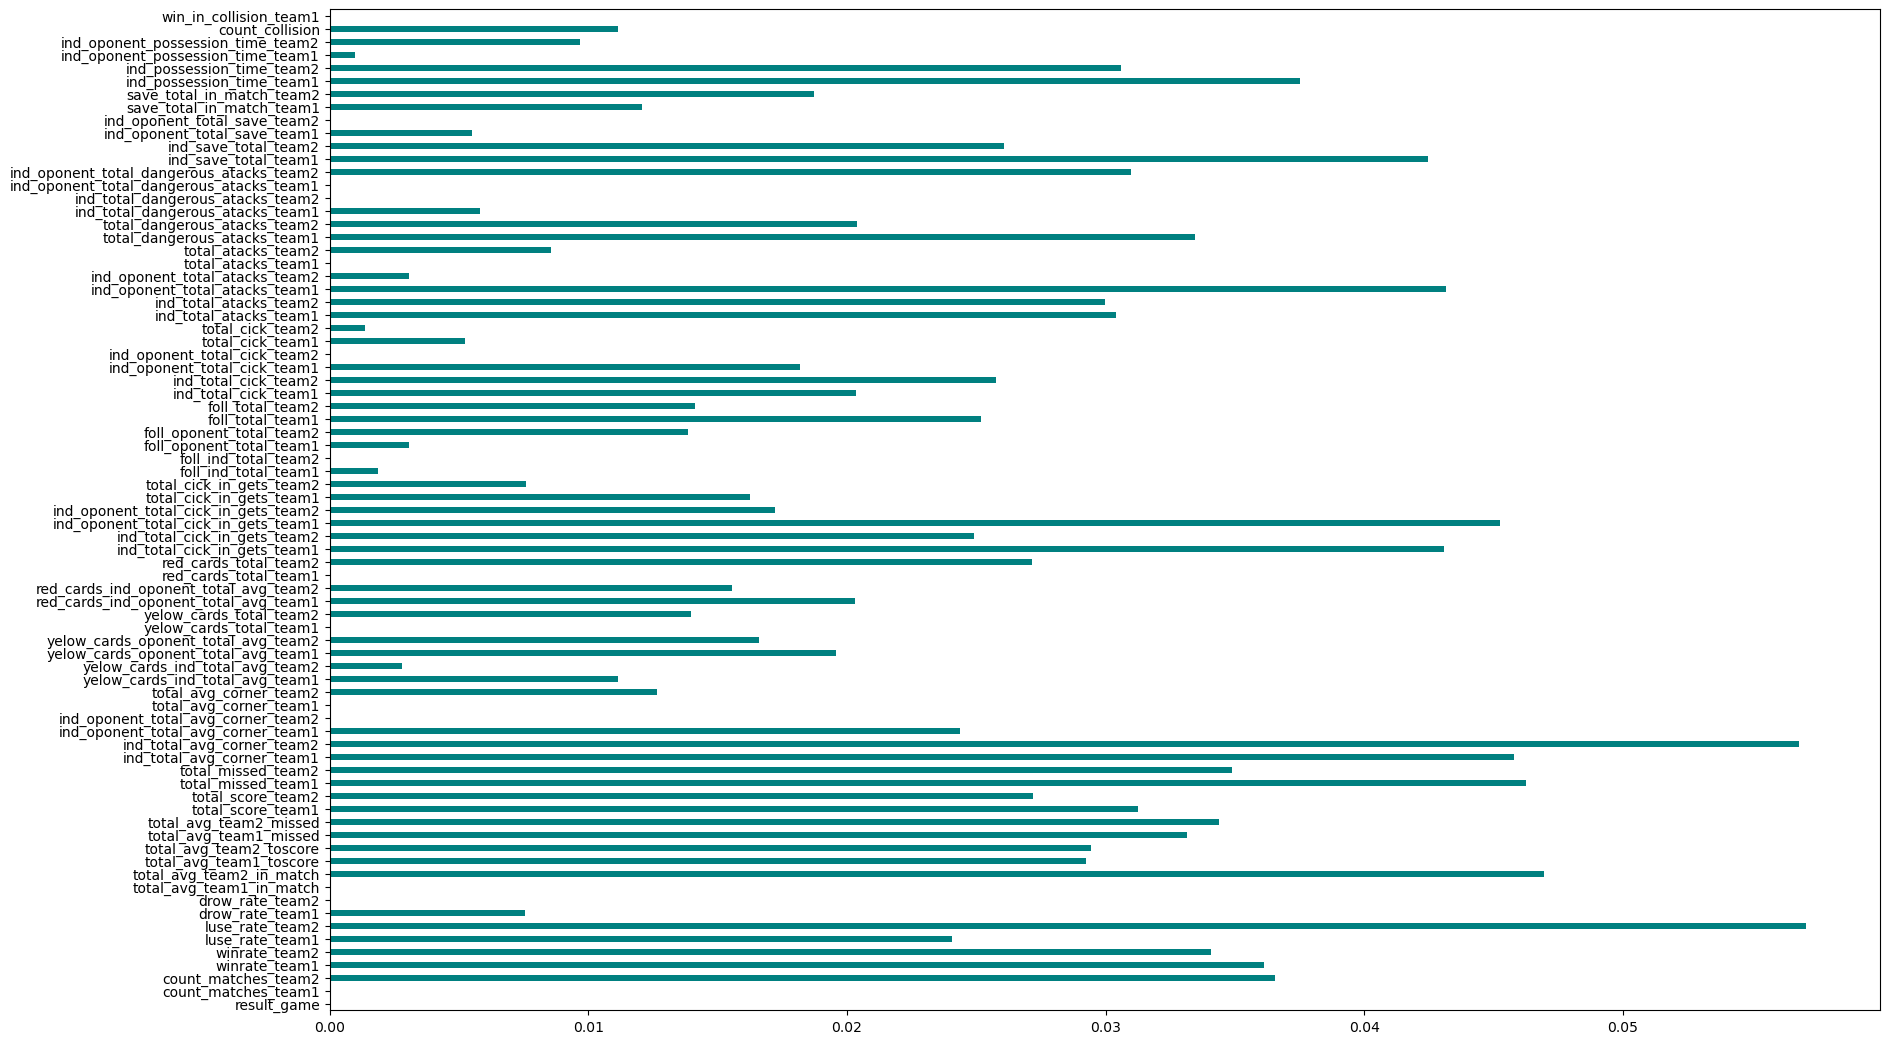

In [71]:
#Сбор информации
importances = mutual_info_classif(X, y)
plt.figure(figsize=(20,13))
feature_importances = pd.Series(importances, dataset.columns[0:len(dataset.columns)-1])
feature_importances.plot(kind='barh', color='teal')
plt.show()

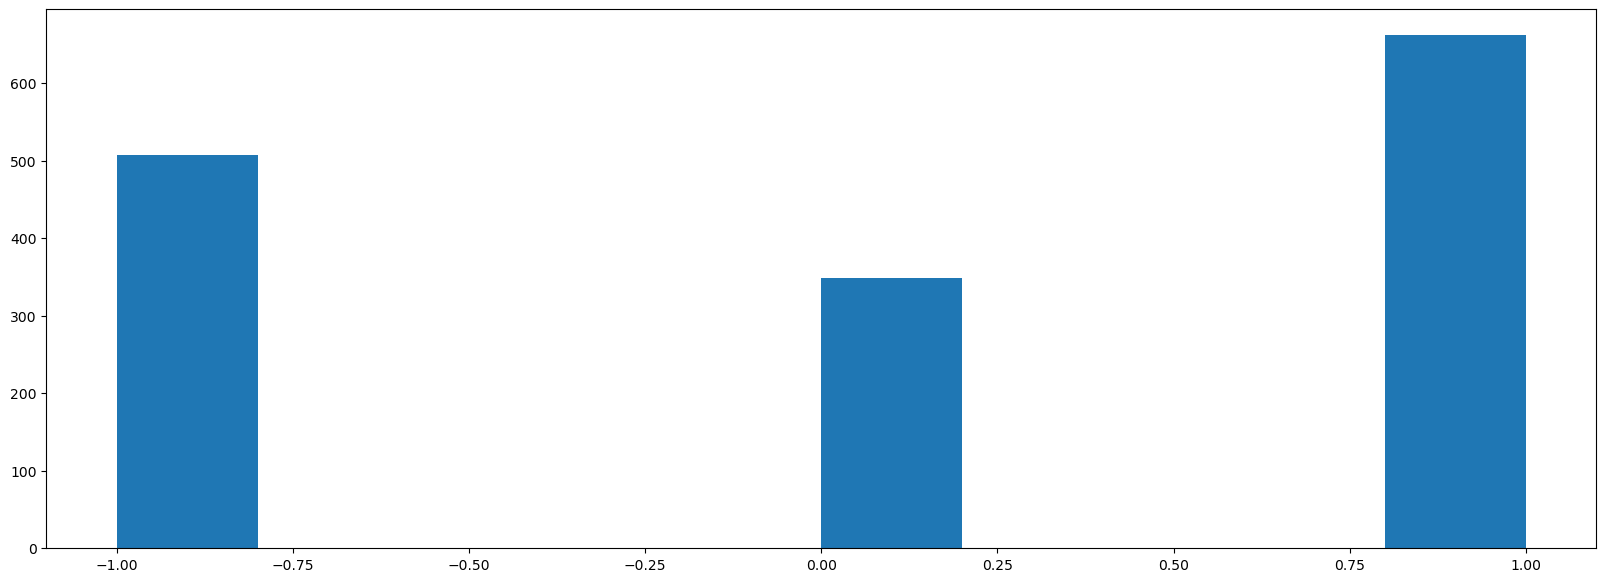

In [72]:
plt.figure(figsize=(20,7))
plt.hist(dataset[dataset.columns[0]].values)
plt.show()

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [95]:
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

Случайный лес с GridSearchCV

In [96]:
vector_y = y_test['result_game'].reset_index(drop=True)

model_forest = RandomForestClassifier(random_state=42)

param_dist = {'n_estimators': [50, 80, 110, 150, 170, 190, 210], 
               'max_features': ['log2', 'sqrt'],
               'max_depth': [2, 4, 5, 6, 7],
               'min_samples_split': [2, 7, 18, 25, 35, 50],
               'min_samples_leaf': [2, 5, 14, 25, 34, 45],
               'bootstrap': [True, False]
             }
print(f'Подбираемые параметры: {param_dist}')
grid_model_forest = GridSearchCV(estimator = model_forest,
                    param_grid = param_dist,
                    scoring='f1_macro',
                    cv=5, 
                    verbose = 3,
                    n_jobs=-1,
                   )       

Подбираемые параметры: {'n_estimators': [50, 80, 110, 150, 170, 190, 210], 'max_features': ['log2', 'sqrt'], 'max_depth': [2, 4, 5, 6, 7], 'min_samples_split': [2, 7, 18, 25, 35, 50], 'min_samples_leaf': [2, 5, 14, 25, 34, 45], 'bootstrap': [True, False]}


In [97]:
start = time.time()
grid_model_forest.fit(X_train, y_train.values.ravel())
end = time.time()

Fitting 5 folds for each of 5040 candidates, totalling 25200 fits


In [98]:
#Сведения об обучении
print(f"Время обучения: {end - start}")
print("Лучшие парметры случайного леса")
print(grid_model_forest.best_params_)
class_labels = grid_model_forest.classes_
print(f"Классы предсказаний: {class_labels}")
print('---------------')

#Оценка качества
y_pred_forest = grid_model_forest.predict(X_test)
print('F1-macro: ', f1_score(y_test, y_pred_forest, average='macro'))
print('Accuracy: ',accuracy_score(y_test, y_pred_forest))
print('Оценка качества по классам')
for target_class in [-1,0,1]:
    binary_predictions = []
    for ans in range(len(vector_y)):
        if vector_y[ans] == target_class:
            binary_predictions.append(1 if y_pred_forest[ans] == vector_y[ans] else 0)
    accuracy = accuracy_score(binary_predictions, [1]*len(binary_predictions))
    print(f"Точность определения класса {target_class}: {accuracy}")

Время обучения: 1031.8230237960815
Лучшие парметры случайного леса
{'bootstrap': False, 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}
Классы предсказаний: [-1  0  1]
---------------
F1-macro:  0.39114095764530665
Accuracy:  0.49500998003992014
Оценка качества по классам
Точность определения класса -1: 0.5542857142857143
Точность определения класса 0: 0.03278688524590164
Точность определения класса 1: 0.7205882352941176


Градиентный бустинг с GridSearchCV

In [99]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_xgboost = le.fit_transform(y_train.values.ravel())

In [100]:
model_xgboost = XGBClassifier(
    objective= 'multi:softmax',
    nthread=3,
    seed = 42
)
parameters_xgboost = {
    'max_depth': range (2, 9, 1),
    'n_estimators': range(60, 180, 40),
    'learning_rate': [0.1, 0.05, 0.055],
    'reg_lambda' : [1,2,3,4],
    'reg_alpha' : [1,2,3,4]
}
grid_search_xgboost = GridSearchCV(
    estimator=model_xgboost,
    param_grid=parameters_xgboost,
    scoring = 'f1_macro',
    n_jobs = 3,
    cv = 10,
    verbose=3
)

In [101]:
start = time.time() 
grid_search_xgboost.fit(X_train, y_train_xgboost)
end = time.time()


Fitting 10 folds for each of 1008 candidates, totalling 10080 fits


In [102]:
#Сведения об обучении
print(f"Время обучения: {end-start}")
print("Лучшие параметры модели: ")
print(grid_search_xgboost.best_params_)

#Оценка качества
y_pred_xgboost = grid_search_xgboost.predict(X_test)
for i in range(len(y_pred_xgboost)):
    y_pred_xgboost[i]-=1
print('---------------')
print('F1-macro: ',f1_score(y_test, y_pred_xgboost, average='macro'))
print('Accuracy: ',accuracy_score(y_test, y_pred_xgboost))
print('Оценка качества по классам')
for target_class in [-1,0,1]:
    binary_predictions = []
    for ans in range(len(vector_y)):
        if vector_y[ans] == target_class:
            binary_predictions.append(1 if y_pred_xgboost[ans] == vector_y[ans] else 0)
    accuracy = accuracy_score(binary_predictions, [1]*len(binary_predictions))
    print(f"Точность определения класса {target_class}: {accuracy}")

Время обучения: 2263.8572402000427
Лучшие параметры модели: 
{'learning_rate': 0.055, 'max_depth': 5, 'n_estimators': 100, 'reg_alpha': 2, 'reg_lambda': 1}
---------------
F1-macro:  0.4025092082618949
Accuracy:  0.4810379241516966
Оценка качества по классам
Точность определения класса -1: 0.5428571428571428
Точность определения класса 0: 0.07377049180327869
Точность определения класса 1: 0.6715686274509803


In [103]:
print(y_pred_xgboost)
y_test.head()

[-1 -1  1  1  1  1  0  0  1  1  1  1 -1 -1  1 -1 -1  1 -1  1  1  1  1 -1
 -1  1 -1  0  1  1 -1  0  1  1 -1 -1  1  1 -1 -1  1  1 -1 -1  1  1  1  0
  1  1  1  1  1 -1 -1  1 -1  1  1  1  1 -1 -1 -1  1 -1 -1  1 -1 -1  1 -1
 -1 -1  1  1  1  1  1  1  1  1  1  1 -1 -1  1 -1  0  1 -1 -1  1  1 -1  1
 -1 -1 -1  1 -1 -1  1 -1 -1  1 -1  1 -1  1 -1  1 -1 -1  1  1  0  1 -1 -1
 -1 -1 -1  1  1 -1  1  1  1  1 -1  1 -1 -1  1  1  0 -1  0  1  1 -1  0 -1
  1  1  1  1  1  1 -1 -1  1 -1  1  1 -1 -1  1  0  0 -1 -1  1 -1  1  1  0
 -1  1  1  1 -1 -1  1  1  1  0 -1  1 -1  1  0 -1  1 -1  1  1 -1  1  1  1
  1  1 -1 -1  1 -1  1 -1  1  1  1  1 -1 -1  0  1  1 -1  1  1  1  1  1  1
  1 -1 -1  1  0 -1 -1  1  1  1 -1  1 -1 -1 -1  1  1  1  1  1  1 -1 -1  1
 -1 -1  1  1  1 -1 -1  1  0 -1  1 -1 -1  1  1  1 -1  1  0 -1  1  1 -1  1
 -1 -1  1 -1 -1  0  1  1  1 -1  1 -1  1 -1  0  1 -1  1  1  1  1  1 -1  1
 -1  1  1  1  1 -1 -1  0  1  1  1  1 -1  1  1  0 -1  1  1  1 -1  1  1  1
 -1  1  1 -1  0 -1 -1  1 -1  0 -1 -1 -1 -1  1  1  1

,result_game
724,0
812,-1
1466,1
1469,1
51,1


In [104]:
feature_importance = grid_search_xgboost.best_estimator_.feature_importances_
sorted_idx = feature_importance.argsort()[::-1]

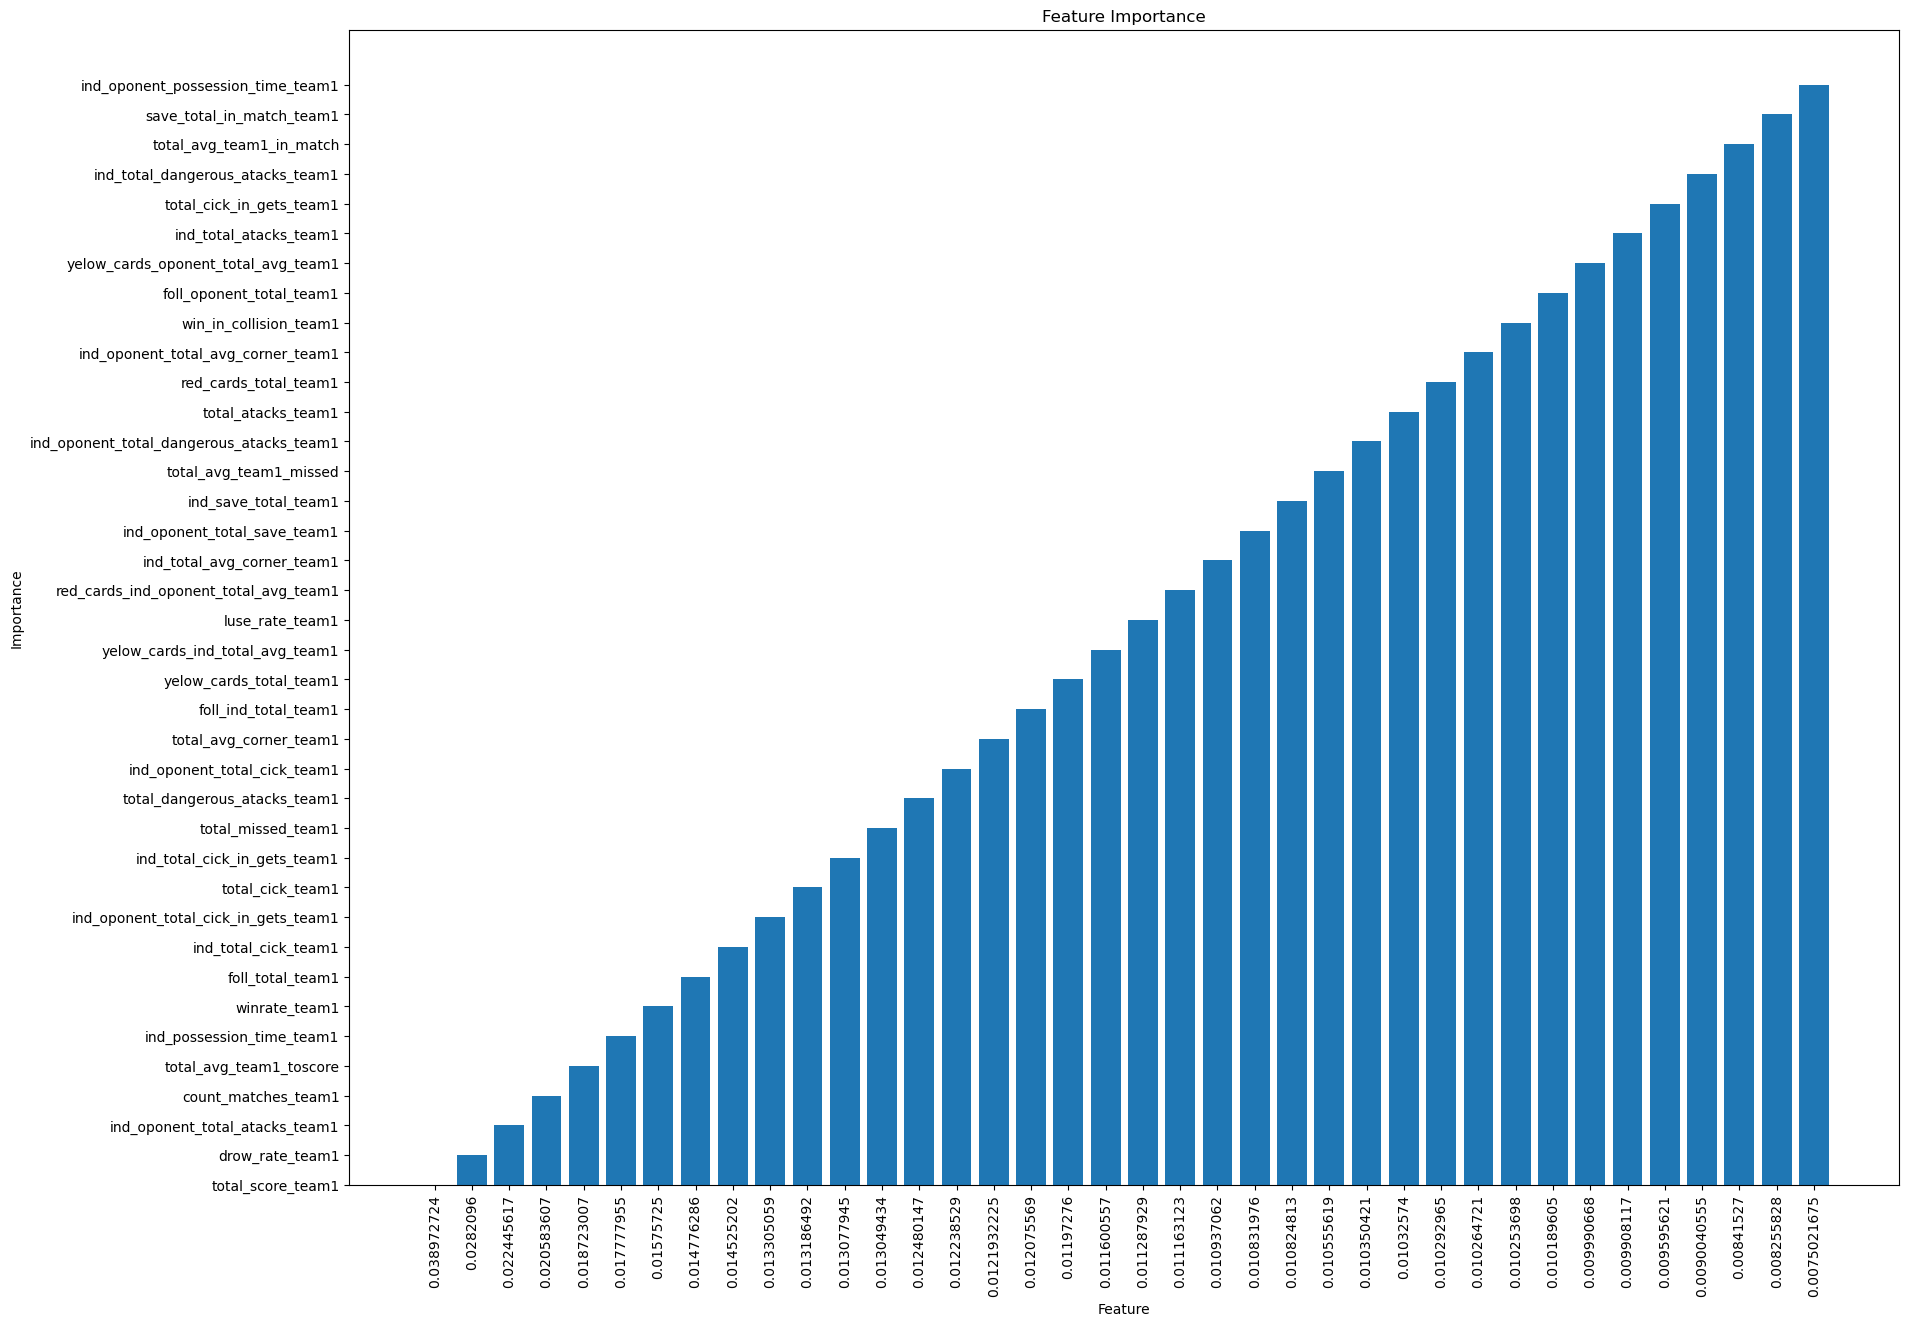

In [105]:
sorted_feature_names = feature_importance[sorted_idx]
sorted_feature_importance = X_train.columns[sorted_idx]

sorted_feature_importance1 =[]
sorted_feature_importance2 = []
sorted_feature_names1 = []
sorted_feature_names2 = []
for i in range(len(sorted_feature_importance)):
    if '1' in sorted_feature_importance[i]:
        sorted_feature_importance1.append(sorted_feature_importance[i])
        sorted_feature_names1.append(sorted_feature_names[i])
    if '2' in sorted_feature_importance[i]:
        sorted_feature_importance2.append(sorted_feature_importance[i])
        sorted_feature_names2.append(sorted_feature_names[i])


plt.figure(figsize=(20, 15))
plt.bar(range(len(sorted_feature_importance1)), sorted_feature_importance1, align="center")
plt.xticks(range(len(sorted_feature_importance1)), sorted_feature_names1, rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.show()

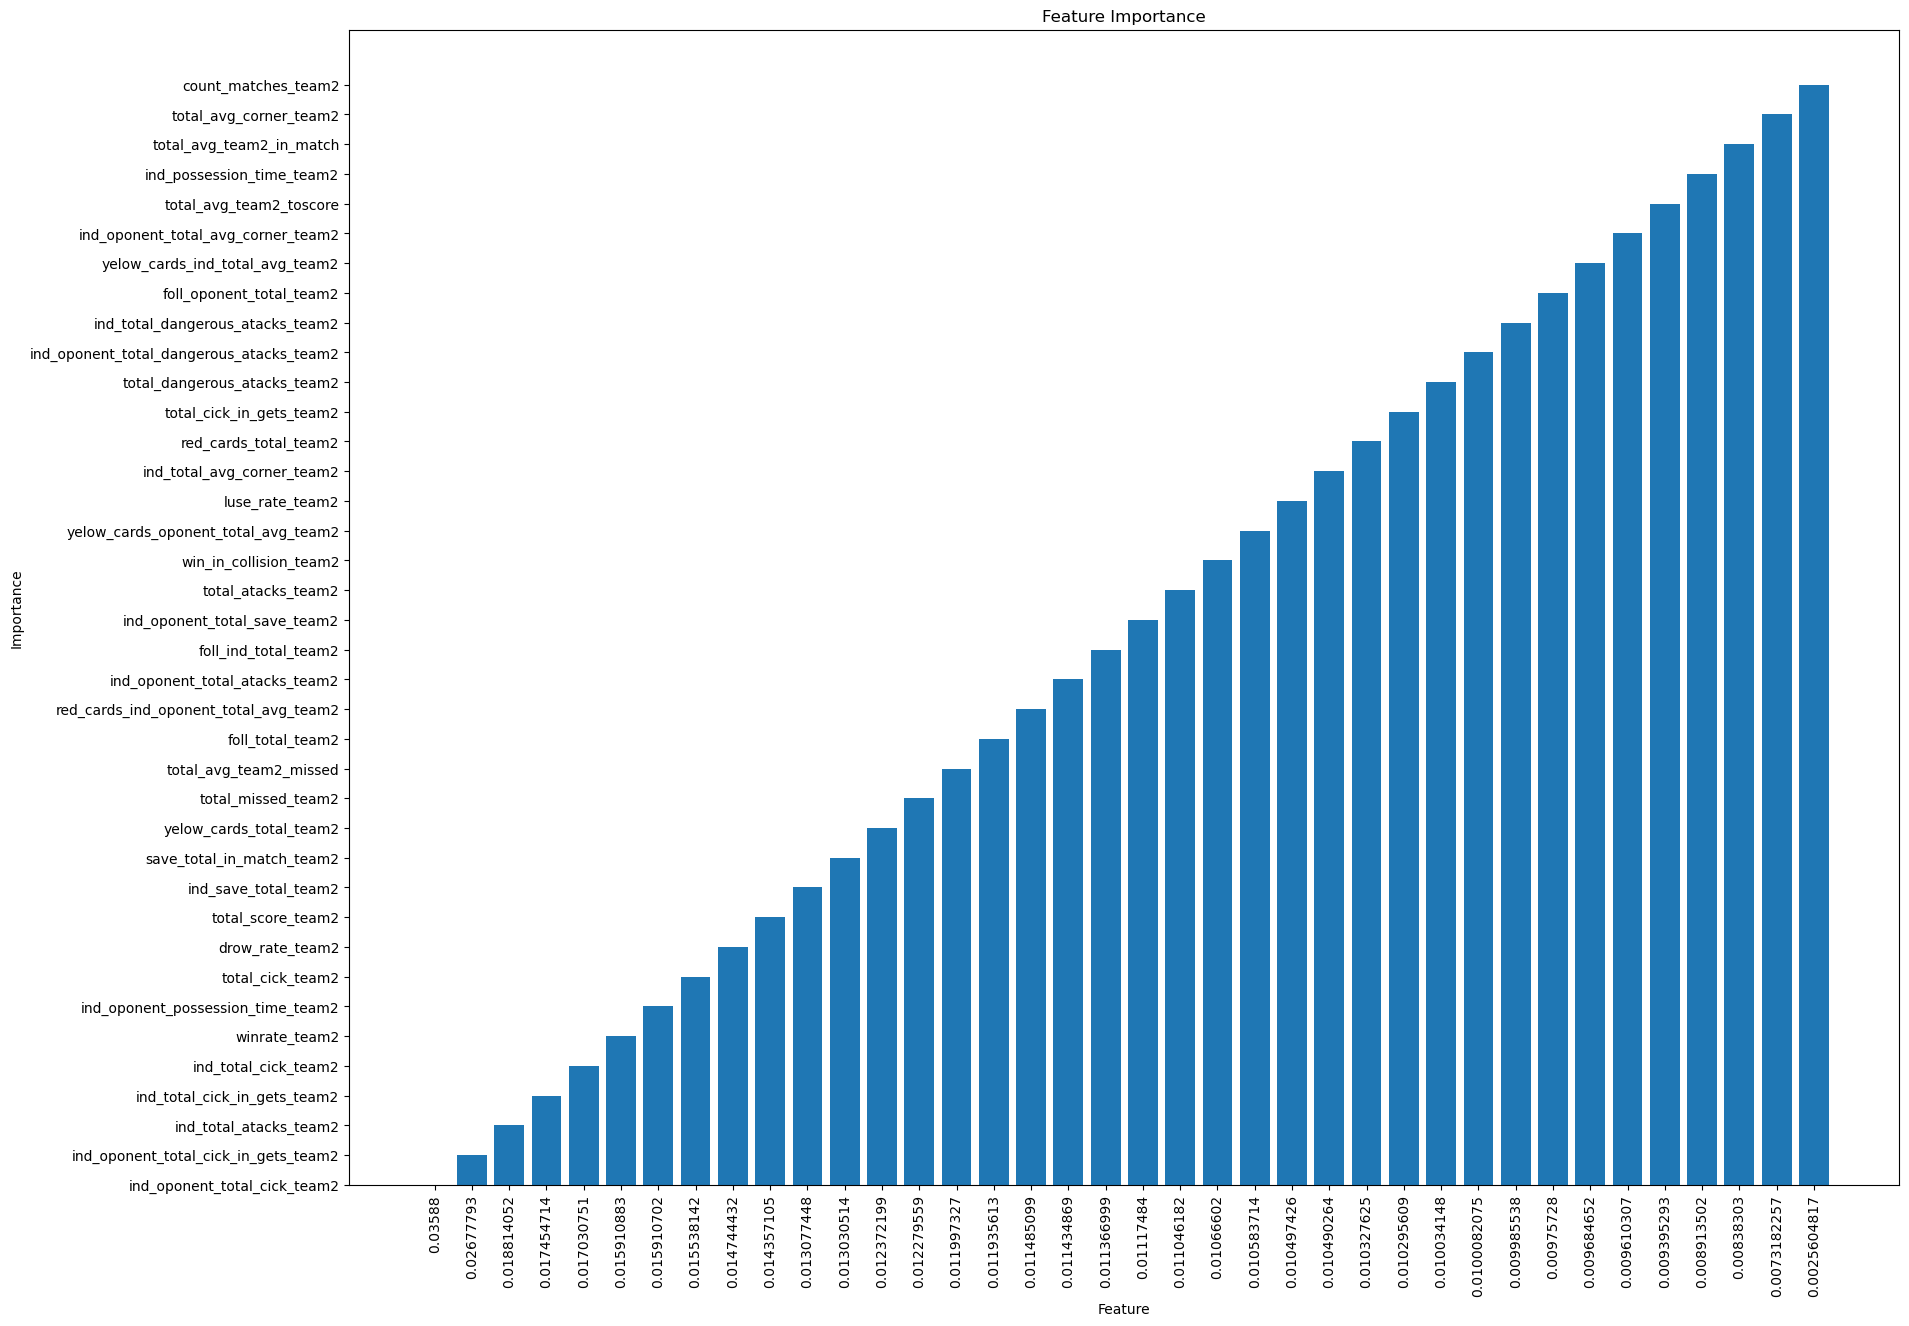

In [106]:
plt.figure(figsize=(20, 15))
plt.bar(range(len(sorted_feature_importance2)), sorted_feature_importance2, align="center")
plt.xticks(range(len(sorted_feature_importance2)), sorted_feature_names2, rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.show()